In [8]:
import pandas as pd

# Loading the initial dataset
file_path = 'FP_call_data.csv'
data = pd.read_csv(file_path)

# Converting columns to datetime
data['arrival_time'] = pd.to_datetime(data['arrival_time'])
data['service_start_time'] = pd.to_datetime(data['service_start_time'])
data['service_end_time'] = pd.to_datetime(data['service_end_time'])

# Extract date from datetime
data['date'] = data['arrival_time'].dt.date

# Calculate time taken in seconds
data['time_taken'] = (data['service_end_time'] - data['service_start_time']).dt.total_seconds()

# Select and rename required columns
processed_data = data[['arrival_time', 'service_start_time', 'service_end_time', 'date', 'time_taken']]

# Save to a new CSV
processed_data.to_csv('processed.csv', index=False)


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the new processed dataset
processed_data = pd.read_csv('processed.csv')

# Ensure datetime columns are in correct dtype
processed_data['arrival_time'] = pd.to_datetime(processed_data['arrival_time'])
processed_data['service_start_time'] = pd.to_datetime(processed_data['service_start_time'])
processed_data['service_end_time'] = pd.to_datetime(processed_data['service_end_time'])
processed_data['date'] = pd.to_datetime(processed_data['date'])

# Calculate total number of calls
total_calls = len(processed_data)

# Calculate average calls per minute
total_minutes = (processed_data['arrival_time'].max() - processed_data['arrival_time'].min()).total_seconds() / 60
calls_per_minute = total_calls / total_minutes

# Calculate number of calls each hour
calls_per_hour = processed_data.groupby(processed_data['arrival_time'].dt.hour).size()

# Calculate mean, median, and variance of the "time_taken"
mean_time_taken = processed_data['time_taken'].mean()
median_time_taken = processed_data['time_taken'].median()
variance_time_taken = processed_data['time_taken'].var()

{'Total Calls': 1000, 'Calls Per Hour': {0: 306, 1: 271, 2: 340, 3: 83}, 'Mean Time Taken': 20.702274073644002, 'Median Time Taken': 14.62670364, 'Variance of Time Taken': 438.9299925628155, 'Average Calls Per Minute': 5.143838811573763}


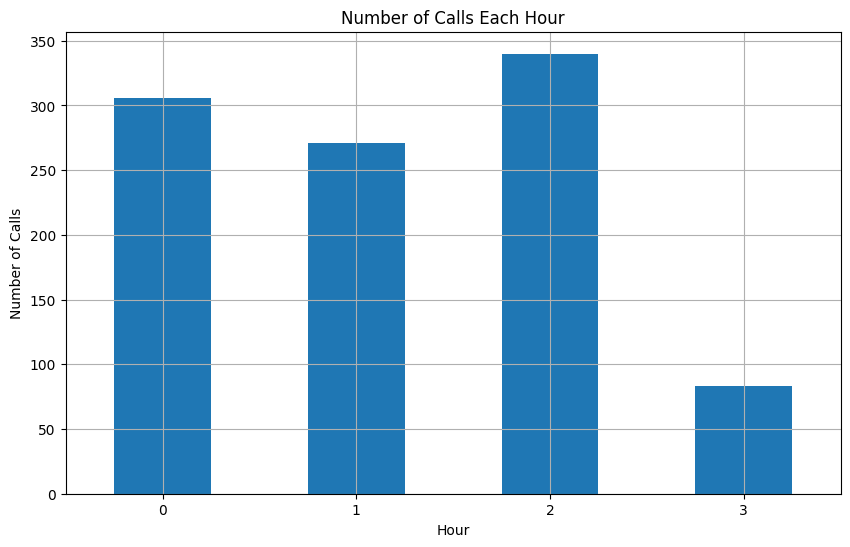

In [10]:
# M/M/1 Queue Metrics
lambda_rate = 5.5  # Arrival rate (calls per minute)
mu_rate = 6.5  # Service rate (calls per minute), converting mean_time_taken from seconds to minutes
N = 10  # Assuming the maximum number of 10 customers in the system

# Calculate utilization (rho)
rho = lambda_rate / mu_rate

# Calculate the average number of customers in the system per minute (L)
L = rho / (1 - rho)

# Calculate the average time a customer spends in the system per minute (W)
W = L / lambda_rate

# Calculate the average number of customers in the queue per minute (Lq)
Lq = L - rho

# Calculate the average waiting time in the queue per minute (Wq)
Wq = Lq / lambda_rate

# Birth-Death Process for Steady-State Probabilities
# Initialize arrays for birth and death rates
lambda_n = lambda_rate * np.ones(N)
mu_n = mu_rate * np.ones(N)

# Calculate steady-state probabilities using Chapman-Kolmogorov equations
pi_n = np.zeros(N)
pi_n[0] = 1  # Initial assumption: all probability in state 0 (no customers)

for n in range(1, N):
    pi_n[n] = (lambda_n[n-1] / mu_n[n]) * pi_n[n-1]

# Normalize probabilities to sum to 1
pi_n = pi_n / np.sum(pi_n)

# Plot number of calls each hour
plt.figure(figsize=(10, 6))
calls_per_hour.plot(kind='bar')
plt.xlabel('Hour')
plt.ylabel('Number of Calls')
plt.title('Number of Calls Each Hour')
plt.xticks(rotation=0)
plt.grid(True)
plt.savefig('calls_per_hour.png')

# Displaying the statistics and queue metrics
stats = {
    'Total Calls': total_calls,
    'Calls Per Hour': calls_per_hour.to_dict(),
    'Mean Time Taken': mean_time_taken,
    'Median Time Taken': median_time_taken,
    'Variance of Time Taken': variance_time_taken,
    'Average Calls Per Minute': calls_per_minute,
}

print(stats)
plt.show()

In [11]:
# Print the results
print(f"Utilization (rho): {rho:.2f}")
print(f"Average number of customers in the system per minute (L): {L:.2f}")
print(f"Average time a customer spends in the system per minute (W): {W:.2f} minutes")
print(f"Average number of customers in the queue per minute (Lq): {Lq:.2f}")
print(f"Average waiting time in the queue per minute (Wq): {Wq:.2f} minutes")
print("\nSteady-State Probabilities:")
for n in range(N):
    print(f"Probability of having {n} customers: {pi_n[n]:.4f}")


# Print the calculated values
print(f"\nTotal Calls : {total_calls}")
print(f"Calls Per Hour: {calls_per_hour.to_dict()}")
print(f"Mean Time Taken: {mean_time_taken}")
print(f"Median Time Taken: {median_time_taken}")
print(f"Variance of Time Taken: {variance_time_taken}")
print(f"Average Calls Per Minute: {calls_per_minute}")

Utilization (rho): 0.85
Average number of customers in the system per minute (L): 5.50
Average time a customer spends in the system per minute (W): 1.00 minutes
Average number of customers in the queue per minute (Lq): 4.65
Average waiting time in the queue per minute (Wq): 0.85 minutes

Steady-State Probabilities:
Probability of having 0 customers: 0.1895
Probability of having 1 customers: 0.1603
Probability of having 2 customers: 0.1357
Probability of having 3 customers: 0.1148
Probability of having 4 customers: 0.0971
Probability of having 5 customers: 0.0822
Probability of having 6 customers: 0.0696
Probability of having 7 customers: 0.0589
Probability of having 8 customers: 0.0498
Probability of having 9 customers: 0.0421

Total Calls : 1000
Calls Per Hour: {0: 306, 1: 271, 2: 340, 3: 83}
Mean Time Taken: 20.702274073644002
Median Time Taken: 14.62670364
Variance of Time Taken: 438.9299925628155
Average Calls Per Minute: 5.143838811573763


RMSE: 0.61
MAE: 0.50


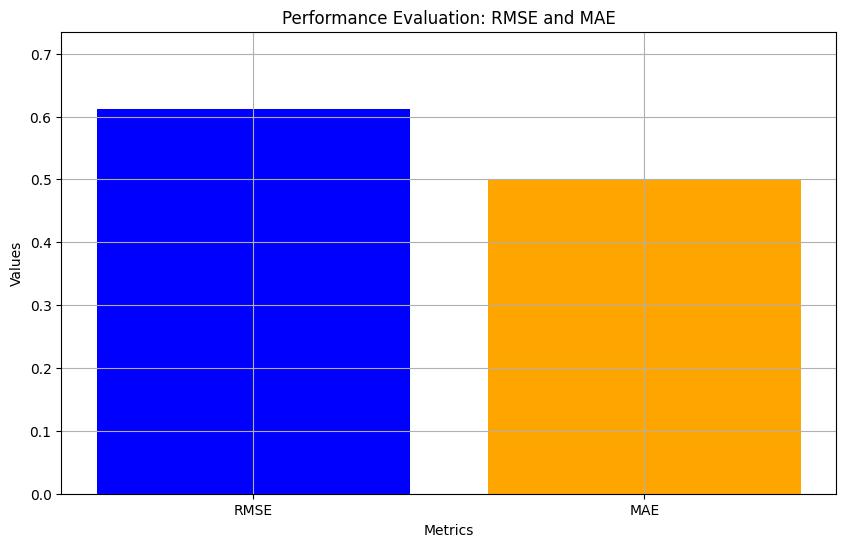

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Example data
y_true = np.array([3.0, -0.5, 2.0, 7.0])
y_pred = np.array([2.5, 0.0, 2.0, 8.0])

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

# Print the calculated values
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Visualization
metrics = ['RMSE', 'MAE']
values = [rmse, mae]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Evaluation: RMSE and MAE')
plt.ylim(0, max(values) * 1.2)
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


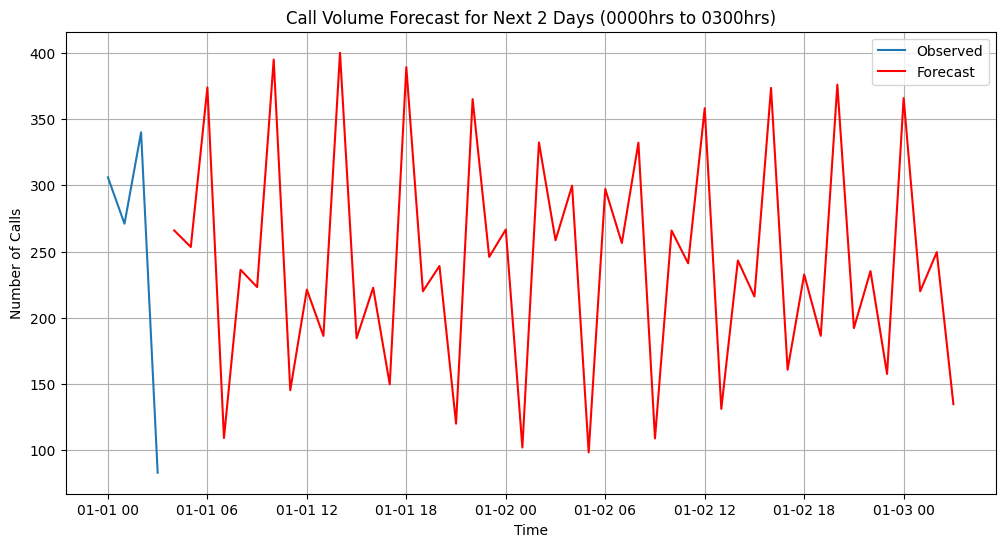

Estimation for the next 2 Days:
                               DateTime  Forecasted Calls
2024-01-01 04:00:00 2024-01-01 04:00:00        265.913325
2024-01-01 05:00:00 2024-01-01 05:00:00        253.443783
2024-01-01 06:00:00 2024-01-01 06:00:00        373.903118
2024-01-01 07:00:00 2024-01-01 07:00:00        109.228381
2024-01-01 08:00:00 2024-01-01 08:00:00        236.209843
2024-01-01 09:00:00 2024-01-01 09:00:00        223.174840
2024-01-01 10:00:00 2024-01-01 10:00:00        394.957751
2024-01-01 11:00:00 2024-01-01 11:00:00        145.302348
2024-01-01 12:00:00 2024-01-01 12:00:00        221.261194
2024-01-01 13:00:00 2024-01-01 13:00:00        186.296149
2024-01-01 14:00:00 2024-01-01 14:00:00        400.106553
2024-01-01 15:00:00 2024-01-01 15:00:00        184.512348
2024-01-01 16:00:00 2024-01-01 16:00:00        222.663727
2024-01-01 17:00:00 2024-01-01 17:00:00        149.753444
2024-01-01 18:00:00 2024-01-01 18:00:00        389.240965
2024-01-01 19:00:00 2024-01-01 19:00:00 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load processed.csv dataset
processed_data = pd.read_csv('processed.csv')

# Ensure datetime columns are in correct dtype
processed_data['arrival_time'] = pd.to_datetime(processed_data['arrival_time'])

# Resample data to hourly frequency and count the number of calls per hour
calls_per_hour = processed_data.resample('H', on='arrival_time').size()

# Filter data for the period from 0000hrs to 0300hrs
calls_per_hour = calls_per_hour[calls_per_hour.index.hour.isin([0, 1, 2, 3])]

# Fit ARIMA model
model = ARIMA(calls_per_hour, order=(5, 1, 0))
model_fit = model.fit()

# Forecast the number of calls for the next 48 hours
forecast = model_fit.forecast(steps=48)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(calls_per_hour, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Number of Calls')
plt.title('Call Volume Forecast for Next 2 Days (0000hrs to 0300hrs)')
plt.legend()
plt.grid(True)
plt.show()

# Create a DataFrame to display the forecast in a table format
forecast_df = pd.DataFrame({
    'DateTime': pd.date_range(start=calls_per_hour.index[-1] + pd.Timedelta(hours=1), periods=48, freq='H'),
    'Forecasted Calls': forecast
})

# Print the forecasted number of calls per hour for the next 2 days in table format
print("Estimation for the next 2 Days:")
print(forecast_df)